In [1]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ninjaxpress_batam.csv')
df = df.dropna()

column_titles = ['rating','caption']
df1 = df.reindex(columns=column_titles)
df1

,rating,caption
0,1.0,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,..."
1,1.0,Saya berkomentar disini karena smua kurir dan ...
3,1.0,(Translated by Google) CS call center on behal...
4,1.0,(Translated by Google) It's outrageous that th...
6,1.0,"(Translated by Google) Good morning, I apologi..."
...,...,...
917,5.0,(Translated by Google) the communication agent...
922,5.0,(Translated by Google) Fast delivery. As fast ...
927,5.0,"(Translated by Google) Thank you, my order nin..."
928,5.0,(Translated by Google) NinjaExspres is very th...


In [5]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [6]:
df1['reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['reviews']
    if review == '0':
        df1['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_52940/1854476216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews'][i] = review.replace('0', row['caption'])


In [8]:
df1.to_csv('ninjavanID1.csv')

### Run 2nd csv

In [10]:
df2 = pd.read_csv('ninjaxpress_ID.csv')

In [11]:
column_titles = ['rating','caption']
df2 = df2.reindex(columns=column_titles)
df2 = df2.dropna()


df2['middle'] = df2['caption'].str.split(")").str[1]

df2['reviews'] = df2['middle'].str.split("(").str[0]

In [12]:
df2 = df2.reset_index()

df2['reviews'].fillna('0', inplace = True)
for i, row in df2.iterrows(): 
    review = row['reviews']

    if review == '0':
        df2['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_52940/2674474058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i] = review.replace('0', row['caption'])


In [13]:
df2.to_csv('ninjavanID2.csv')

### Combining files together 

In [14]:
files = os.path.join("ninjavanID*.csv")
files = glob.glob(files)
df_combi = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_combi.to_csv("combined_ninjavanID.csv")
df_combi

,Unnamed: 0,index,rating,caption,middle,reviews
0,0,0,1.0,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,...",NaN,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,..."
1,1,1,1.0,Saya berkomentar disini karena smua kurir dan ...,NaN,Saya berkomentar disini karena smua kurir dan ...
2,2,3,1.0,(Translated by Google) CS call center on behal...,CS call center on behalf of Novi and Agung is...,CS call center on behalf of Novi and Agung is...
3,3,4,1.0,(Translated by Google) It's outrageous that th...,It's outrageous that the ninja company's cour...,It's outrageous that the ninja company's cour...
4,4,6,1.0,"(Translated by Google) Good morning, I apologi...","Good morning, I apologize in advance that I h...","Good morning, I apologize in advance that I h..."
...,...,...,...,...,...,...
1506,779,1031,5.0,(Translated by Google) Ok really (Original) O...,Ok really (Original,Ok really
1507,780,1033,5.0,(Translated by Google) Super fast (Original) ...,Super fast (Original,Super fast
1508,781,1035,4.0,(Translated by Google) The delivery is fast an...,The delivery is fast and the courier is frien...,The delivery is fast and the courier is frien...
1509,782,1045,5.0,(Translated by Google) Thank God the delivery ...,"Thank God the delivery is good, the goods arr...","Thank God the delivery is good, the goods arr..."


### Clean the data

In [15]:
df_combi = pd.read_csv('combined_ninjavanID.csv')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['reviews'] = pd.DataFrame(df_combi['reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,Unnamed: 0.1,index,rating,caption,middle,reviews
0,0,0,0,1.0,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,...",NaN,pengiriman terburuk paket dibawa kabur kurir s...
1,1,1,1,1.0,Saya berkomentar disini karena smua kurir dan ...,NaN,saya berkomentar disini karena smua kurir dan ...
2,2,2,3,1.0,(Translated by Google) CS call center on behal...,CS call center on behalf of Novi and Agung is...,cs call center behalf novi agung good handling...
3,3,3,4,1.0,(Translated by Google) It's outrageous that th...,It's outrageous that the ninja company's cour...,outrageous ninja companys courier salary paid ...
4,4,4,6,1.0,"(Translated by Google) Good morning, I apologi...","Good morning, I apologize in advance that I h...",good morning apologize advance something say d...
...,...,...,...,...,...,...,...
1506,1506,779,1031,5.0,(Translated by Google) Ok really (Original) O...,Ok really (Original,ok really
1507,1507,780,1033,5.0,(Translated by Google) Super fast (Original) ...,Super fast (Original,super fast
1508,1508,781,1035,4.0,(Translated by Google) The delivery is fast an...,The delivery is fast and the courier is frien...,delivery fast courier friendly
1509,1509,782,1045,5.0,(Translated by Google) Thank God the delivery ...,"Thank God the delivery is good, the goods arr...",thank god delivery good goods arrive safely


### Sentiment analysis 


In [16]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['reviews'] = pd.DataFrame(df_combi['reviews'].apply(clean_text_round2))


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['sentiment'] = pd.DataFrame(df_combi['reviews'].apply(sentiment_scores))

In [27]:
column_titles = ['rating','reviews','sentiment']
df_combi = df_combi.reindex(columns=column_titles)
df_combi.to_csv('ninjavan_ID.csv')

In [28]:
df_neg = df_combi.drop(df_combi[df_combi['sentiment'] != 'Negative'].index)
df_neg

,rating,reviews,sentiment
3,1.0,outrageous ninja company courier salary paid t...,Negative
13,1.0,sorry want complain item broken complained sel...,Negative
15,1.0,seller new online shop used expedition really ...,Negative
18,1.0,package arrived day status failed send continu...,Negative
23,1.0,jancoook expedition ninja name become bad use ...,Negative
...,...,...,...
1445,1.0,ive using messenger long time disappointed ord...,Negative
1448,1.0,requested pickup via tokopedia tomorrow night ...,Negative
1461,1.0,time using ninja shipping service package lost...,Negative
1468,1.0,worst shipping ever experienced send jakarta b...,Negative


In [29]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['reviews'].str.cat(sep=' ')

In [30]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 439),
 ('package', 242),
 ('service', 195),
 ('ninja', 185),
 ('bad', 172),
 ('day', 137),
 ('time', 125),
 ('courier', 117),
 ('delivery', 101),
 ('arrived', 97),
 ('disappointed', 90),
 ('expedition', 84),
 ('really', 82),
 ('even', 78),
 ('use', 76),
 ('long', 62),
 ('using', 59),
 ('though', 58),
 ('arrive', 58),
 ('sent', 56),
 ('item', 55),
 ('good', 54),
 ('didnt', 54),
 ('send', 53),
 ('week', 51),
 ('dont', 50),
 ('hasnt', 48),
 ('c', 46),
 ('shipping', 46),
 ('express', 44),
 ('worst', 44),
 ('want', 42),
 ('one', 42),
 ('status', 41),
 ('jakarta', 39),
 ('first', 38),
 ('yet', 38),
 ('order', 38),
 ('customer', 38),
 ('already', 38),
 ('pickup', 36),
 ('come', 34),
 ('still', 34),
 ('disappointing', 34),
 ('please', 32),
 ('slow', 32),
 ('like', 32),
 ('lost', 31),
 ('always', 31),
 ('received', 31),
 ('star', 30),
 ('seller', 29),
 ('many', 29),
 ('address', 25),
 ('close', 24),
 ('lazada', 24),
 ('doesnt', 22),
 ('failed', 22),
 ('took', 22),
 ('waiting', 22),
 ('

In [31]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use','call','one','though', 'didnt', 'dont', 'hasnt', 'c',]
stop_words = add_stop_words + stop 

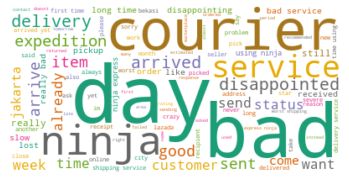

In [32]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=95, random_state=59, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

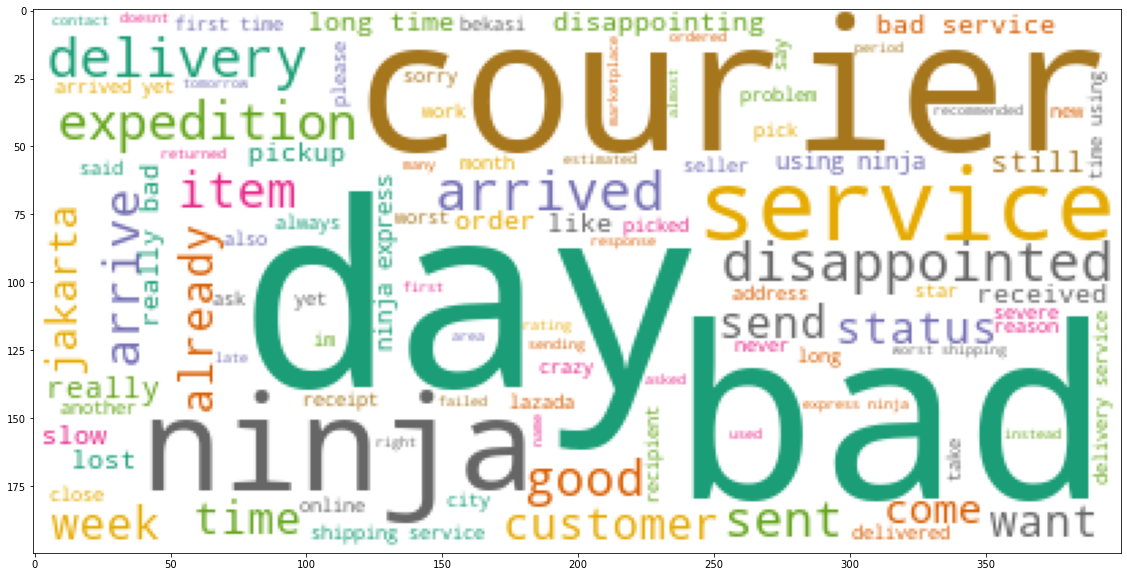

In [25]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [33]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['reviews'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'reviews':'Late reviews'})

In [34]:
df_late.to_csv('Late_reviews_ninjaID.csv')